In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ola_driver_dataset.csv')

#data analysis

In [3]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
df.shape

(19104, 14)

In [5]:
df.dtypes

Unnamed: 0                int64
MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object

statistical summary

In [6]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


univariant analysis

<Axes: xlabel='Age', ylabel='Count'>

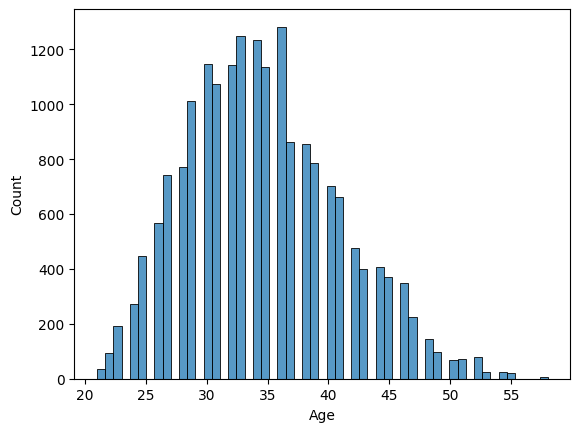

In [7]:

  sns.histplot(df['Age'])

Text(0.5, 1.0, 'sex ratio of drivers')

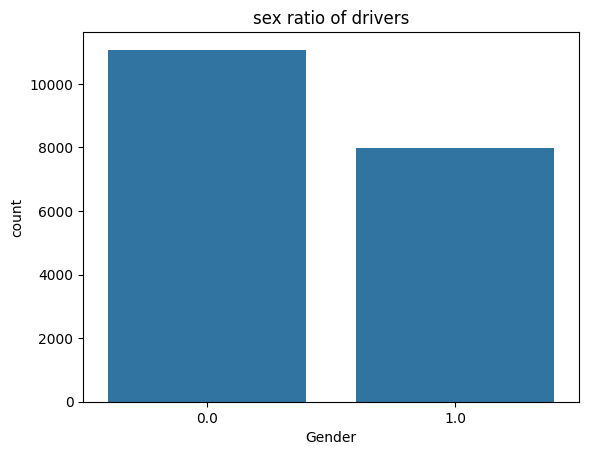

In [8]:
sns.countplot(x = df['Gender'])
plt.title('sex ratio of drivers')

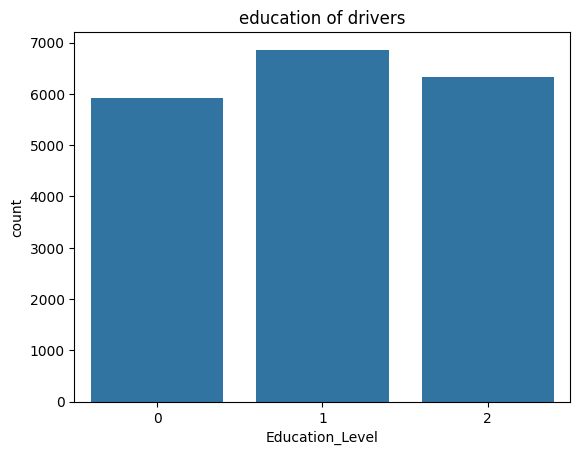

In [9]:
sns.countplot(x = df['Education_Level'])
plt.title('education of drivers')
plt.show()

Text(0.5, 1.0, 'income of drivers')

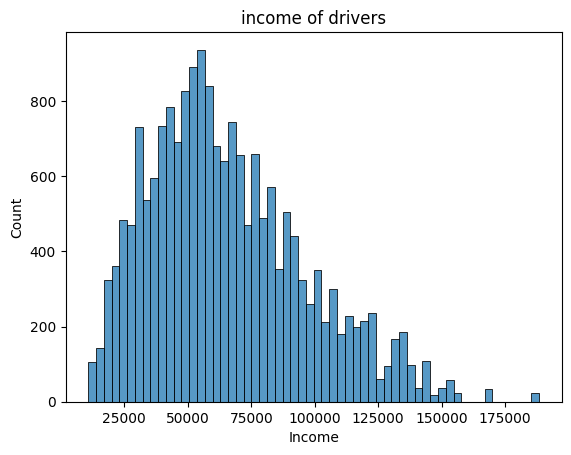

In [10]:
sns.histplot(df['Income'])
plt.title('income of drivers')

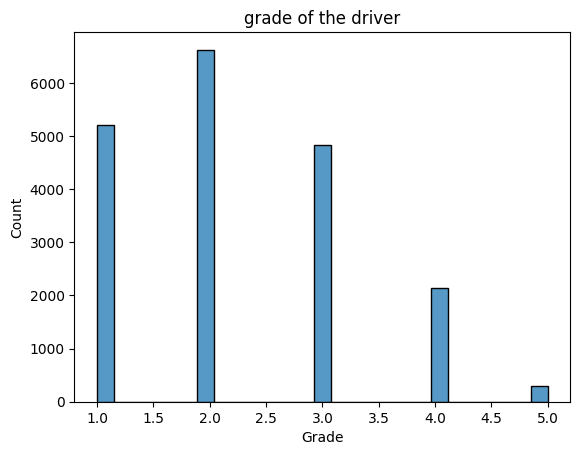

In [11]:
sns.histplot(df['Grade'])
plt.title('grade of the driver')
plt.show()

In [12]:
df.head(2)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2


In [13]:
df['City'].nunique()

29

Text(0.5, 1.0, 'income if the drivers')

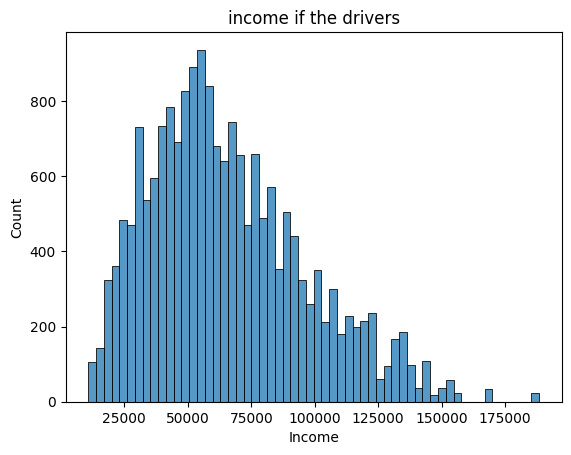

In [14]:
sns.histplot(df['Income'])
plt.title('income if the drivers')

Text(0.5, 1.0, 'ratings of driver')

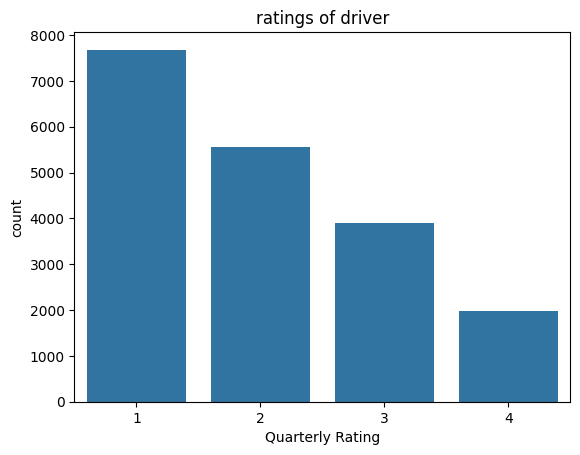

In [15]:
sns.countplot(x = df['Quarterly Rating'])
plt.title('ratings of driver')

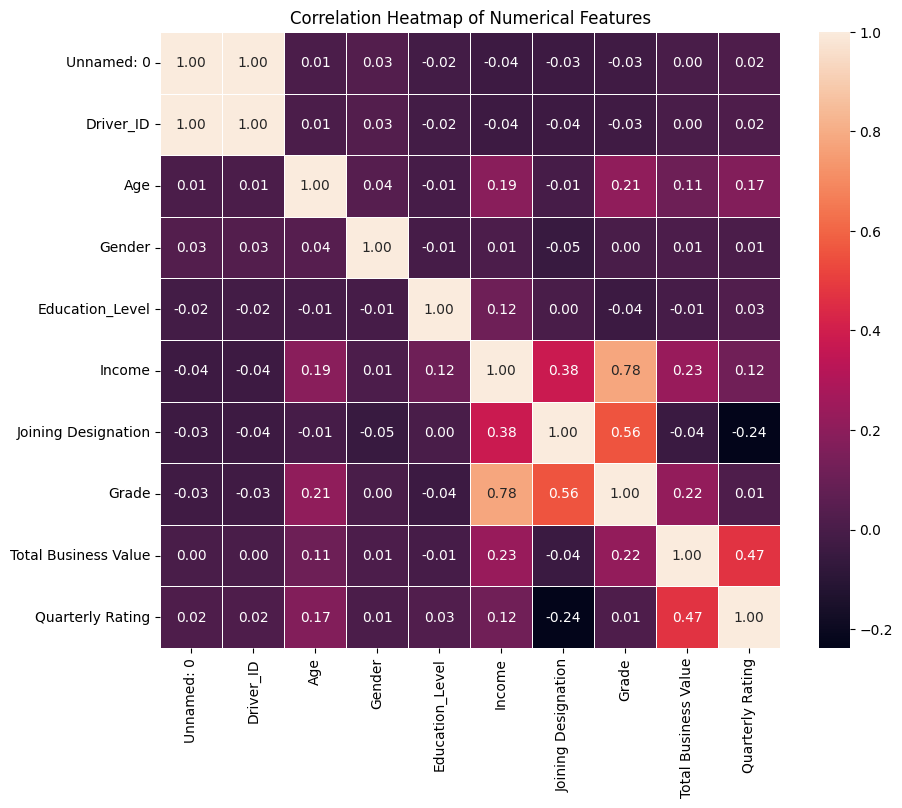

In [16]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float','int'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

A. converting datatype of date related column

MMM-YY

In [17]:
df['MMM-YY'] = df['MMM-YY'].str.replace('/,-',' ')

In [18]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], format='mixed')

Dateofjoining

In [19]:
df['Dateofjoining'] = df['Dateofjoining'].str.replace('/,-', '')

In [20]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format = 'mixed')

In [21]:
df['Dateofjoining'].value_counts()

Dateofjoining
2015-07-23    192
2020-07-31    150
2019-07-04    146
2016-04-25    134
2015-07-30    118
             ... 
2018-02-13      1
2018-01-26      1
2020-12-27      1
2018-09-26      1
2019-12-03      1
Name: count, Length: 869, dtype: int64

B.KNN imputation

In [22]:
num_df = df.select_dtypes(include = ['float','int'])

In [23]:
num_df.isna().sum()

Unnamed: 0               0
Driver_ID                0
Age                     61
Gender                  52
Education_Level          0
Income                   0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
dtype: int64

In [24]:
from sklearn.impute import KNNImputer

In [25]:
imputer = KNNImputer(n_neighbors=5)

In [26]:
imputed = imputer.fit_transform(num_df)
knn_df = pd.DataFrame(imputed,columns = num_df.columns)
knn_df.head()
knn_df.isna().sum()

Unnamed: 0              0
Driver_ID               0
Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [27]:
df.drop(num_df,axis = 1,inplace=True)

In [28]:
df.head()

,MMM-YY,City,Dateofjoining,LastWorkingDate
0,2019-01-01,C23,2018-12-24,NaN
1,2019-02-01,C23,2018-12-24,NaN
2,2019-03-01,C23,2018-12-24,03/11/19
3,2020-11-01,C7,2020-11-06,NaN
4,2020-12-01,C7,2020-11-06,NaN


In [29]:
knn_df.isna().sum()

Unnamed: 0              0
Driver_ID               0
Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [30]:
df = pd.concat([knn_df, df], axis=1)

In [31]:
df.isna().sum()

Unnamed: 0                  0
Driver_ID                   0
Age                         0
Gender                      0
Education_Level             0
Income                      0
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
MMM-YY                      0
City                        0
Dateofjoining               0
LastWorkingDate         17488
dtype: int64

In [32]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [33]:
df.tail(10)

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,City,Dateofjoining,LastWorkingDate
19094,2787.0,28.0,1.0,2.0,69498.0,1.0,1.0,0.0,1.0,2019-04-01,C20,2018-07-21,NaN
19095,2787.0,28.0,1.0,2.0,69498.0,1.0,1.0,0.0,1.0,2019-05-01,C20,2018-07-21,NaN
19096,2787.0,28.0,1.0,2.0,69498.0,1.0,1.0,0.0,1.0,2019-06-01,C20,2018-07-21,20/06/19
19097,2788.0,29.0,0.0,2.0,70254.0,2.0,2.0,0.0,1.0,2020-06-01,C27,2020-06-08,NaN
19098,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,497690.0,3.0,2020-07-01,C27,2020-06-08,NaN
19099,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0,2020-08-01,C27,2020-06-08,NaN
19100,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0,2020-09-01,C27,2020-06-08,NaN
19101,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0,2020-10-01,C27,2020-06-08,NaN
19102,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0,2020-11-01,C27,2020-06-08,NaN
19103,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,411480.0,2.0,2020-12-01,C27,2020-06-08,NaN


C. aggregating data

#feature engineering

1. Quarterly rating column

In [34]:
df['rating'] = df.groupby('Driver_ID')['Quarterly Rating'].diff(periods=-1,axis=0).gt(0).astype(float)
df['rating'].value_counts()

rating
0.0    17758
1.0     1346
Name: count, dtype: int64

In [35]:
df.head(5)

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,City,Dateofjoining,LastWorkingDate,rating
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,C23,2018-12-24,NaN,0.0
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,C23,2018-12-24,NaN,0.0
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,C23,2018-12-24,03/11/19,0.0
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-01,C7,2020-11-06,NaN,0.0
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-12-01,C7,2020-11-06,NaN,0.0


2. creating a target column

In [36]:
df.isna().sum()

Driver_ID                   0
Age                         0
Gender                      0
Education_Level             0
Income                      0
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
MMM-YY                      0
City                        0
Dateofjoining               0
LastWorkingDate         17488
rating                      0
dtype: int64

In [37]:
df['LastWorkingDate'].value_counts()

LastWorkingDate
29/07/20    70
22/09/19    26
17/03/19    14
28/11/20    13
17/02/20    13
            ..
11/12/19     1
08/11/19     1
18/06/19     1
15/04/19     1
28/10/20     1
Name: count, Length: 493, dtype: int64

In [38]:
df['LastWorkingDate'].dtypes

dtype('O')

In [39]:
df.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,City,Dateofjoining,LastWorkingDate,rating
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,C23,2018-12-24,NaN,0.0
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,C23,2018-12-24,NaN,0.0
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,C23,2018-12-24,03/11/19,0.0
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-01,C7,2020-11-06,NaN,0.0
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-12-01,C7,2020-11-06,NaN,0.0


In [40]:
df['Target'] = df['LastWorkingDate'].apply(lambda x: 0 if pd.isnull(x)else 1)


In [41]:
df.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,City,Dateofjoining,LastWorkingDate,rating,Target
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,C23,2018-12-24,NaN,0.0,0
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,C23,2018-12-24,NaN,0.0,0
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,C23,2018-12-24,03/11/19,0.0,1
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-01,C7,2020-11-06,NaN,0.0,0
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-12-01,C7,2020-11-06,NaN,0.0,0


3. creating monthly increased column

In [42]:
#df['Target'].value_counts()

In [43]:
df.head(5)

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,City,Dateofjoining,LastWorkingDate,rating,Target
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,C23,2018-12-24,NaN,0.0,0
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,C23,2018-12-24,NaN,0.0,0
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,C23,2018-12-24,03/11/19,0.0,1
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-01,C7,2020-11-06,NaN,0.0,0
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-12-01,C7,2020-11-06,NaN,0.0,0


In [44]:
df['Total Business Value'].dtypes

dtype('float64')

In [45]:
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], errors='coerce')


In [46]:
df['incresed income'] = df.groupby('Driver_ID')['Total Business Value'].transform(lambda x :(x > x.shift(1).astype(float)))
df['incresed income'] = df['incresed income'].astype(int)

In [47]:
df.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,City,Dateofjoining,LastWorkingDate,rating,Target,incresed income
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,C23,2018-12-24,NaT,0.0,0,0
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,C23,2018-12-24,NaT,0.0,0,0
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,C23,2018-12-24,2019-03-11,0.0,1,1
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-01,C7,2020-11-06,NaT,0.0,0,0
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-12-01,C7,2020-11-06,NaT,0.0,0,0


In [48]:
df = df.drop('LastWorkingDate',axis = 1)

In [49]:
df

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,City,Dateofjoining,rating,Target,incresed income
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,C23,2018-12-24,0.0,0,0
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,C23,2018-12-24,0.0,0,0
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,C23,2018-12-24,0.0,1,1
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-01,C7,2020-11-06,0.0,0,0
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-12-01,C7,2020-11-06,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0,2020-08-01,C27,2020-06-08,0.0,0,1
19100,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0,2020-09-01,C27,2020-06-08,1.0,0,0
19101,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0,2020-10-01,C27,2020-06-08,0.0,0,0
19102,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0,2020-11-01,C27,2020-06-08,0.0,0,1


In [50]:
df['incresed income'].value_counts()

incresed income
0    12059
1     7045
Name: count, dtype: int64

In [51]:
df.head(1)

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,City,Dateofjoining,rating,Target,incresed income
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,C23,2018-12-24,0.0,0,0


In [52]:
#df['Joining Designation'].value_counts()

In [53]:
df['Year'] = df['MMM-YY'].dt.year   #1

In [54]:
df['Month'] = df['MMM-YY'].dt.month    #2

In [55]:
df.drop(['MMM-YY'],axis=1)   #3

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,City,Dateofjoining,rating,Target,incresed income,Year,Month
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,C23,2018-12-24,0.0,0,0,2019,1
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,C23,2018-12-24,0.0,0,0,2019,2
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,C23,2018-12-24,0.0,1,1,2019,3
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,2020-11-06,0.0,0,0,2020,11
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,2020-11-06,0.0,0,0,2020,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0,C27,2020-06-08,0.0,0,1,2020,8
19100,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0,C27,2020-06-08,1.0,0,0,2020,9
19101,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0,C27,2020-06-08,0.0,0,0,2020,10
19102,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0,C27,2020-06-08,0.0,0,1,2020,11


In [56]:
reference_date = df['Dateofjoining'].max()    #4
reference_date
df['worki_day'] = (reference_date - df['Dateofjoining']).dt.days
df['worki_day']

0        735
1        735
2        735
3         52
4         52
        ... 
19099    203
19100    203
19101    203
19102    203
19103    203
Name: worki_day, Length: 19104, dtype: int64

In [57]:
df.drop(['Dateofjoining'],axis=1,inplace=True)    #5
df.drop(['MMM-YY'],axis=1,inplace=True)

In [58]:
df

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,City,rating,Target,incresed income,Year,Month,worki_day
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,C23,0.0,0,0,2019,1,735
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,C23,0.0,0,0,2019,2,735
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,C23,0.0,1,1,2019,3,735
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,0.0,0,0,2020,11,52
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,0.0,0,0,2020,12,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0,C27,0.0,0,1,2020,8,203
19100,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0,C27,1.0,0,0,2020,9,203
19101,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0,C27,0.0,0,0,2020,10,203
19102,2788.0,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0,C27,0.0,0,1,2020,11,203


C. Aggregating the data

In [59]:
df_aggregated = df.groupby('Driver_ID').agg({'Total Business Value':'sum',
                                  'Age':'first',
                                  'Gender':'first',
                                  'Education_Level':'first',
                                  'Income':'mean',
                                  'Joining Designation':'first',
                                  'Grade':'first',
                                  'City':'first',
                                  'Quarterly Rating':'mean',
                              'rating':'first',
                             'incresed income':'mean',
                             'Target':'first',
                              'Year' : 'first',
                              'Month':'first',
                              'worki_day':'first'}).reset_index();

In [60]:
df_aggregated

,Driver_ID,Total Business Value,Age,Gender,Education_Level,Income,Joining Designation,Grade,City,Quarterly Rating,rating,incresed income,Target,Year,Month,worki_day
0,1.0,1715580.0,28.0,0.0,2.0,57387.0,1.0,1.0,C23,2.000000,0.0,0.333333,0,2019,1,735
1,2.0,0.0,31.0,0.0,2.0,67016.0,2.0,2.0,C7,1.000000,0.0,0.000000,0,2020,11,52
2,4.0,350000.0,43.0,0.0,2.0,65603.0,2.0,2.0,C13,1.000000,0.0,0.200000,0,2019,12,387
3,5.0,120360.0,29.0,0.0,0.0,46368.0,1.0,1.0,C9,1.000000,0.0,0.333333,0,2019,1,719
4,6.0,1265000.0,31.0,1.0,1.0,78728.0,3.0,3.0,C11,1.600000,0.0,0.200000,0,2020,8,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784.0,21748820.0,33.0,0.0,0.0,82815.0,2.0,3.0,C24,2.625000,0.0,0.541667,0,2019,1,1901
2377,2785.0,0.0,34.0,1.0,0.0,12105.0,1.0,1.0,C9,1.000000,0.0,0.000000,0,2020,8,122
2378,2786.0,2815090.0,44.0,0.0,0.0,35370.0,2.0,2.0,C19,1.666667,0.0,0.333333,0,2019,1,881
2379,2787.0,977830.0,28.0,1.0,2.0,69498.0,1.0,1.0,C20,1.500000,0.0,0.166667,0,2019,1,891


In [61]:
df_aggregated.dtypes

Driver_ID               float64
Total Business Value    float64
Age                     float64
Gender                  float64
Education_Level         float64
Income                  float64
Joining Designation     float64
Grade                   float64
City                     object
Quarterly Rating        float64
rating                  float64
incresed income         float64
Target                    int64
Year                      int32
Month                     int32
worki_day                 int64
dtype: object

#encoding

In [62]:
df_aggregated['City'] = df_aggregated['City'].str.lstrip('C')

In [63]:
df_aggregated

,Driver_ID,Total Business Value,Age,Gender,Education_Level,Income,Joining Designation,Grade,City,Quarterly Rating,rating,incresed income,Target,Year,Month,worki_day
0,1.0,1715580.0,28.0,0.0,2.0,57387.0,1.0,1.0,23,2.000000,0.0,0.333333,0,2019,1,735
1,2.0,0.0,31.0,0.0,2.0,67016.0,2.0,2.0,7,1.000000,0.0,0.000000,0,2020,11,52
2,4.0,350000.0,43.0,0.0,2.0,65603.0,2.0,2.0,13,1.000000,0.0,0.200000,0,2019,12,387
3,5.0,120360.0,29.0,0.0,0.0,46368.0,1.0,1.0,9,1.000000,0.0,0.333333,0,2019,1,719
4,6.0,1265000.0,31.0,1.0,1.0,78728.0,3.0,3.0,11,1.600000,0.0,0.200000,0,2020,8,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784.0,21748820.0,33.0,0.0,0.0,82815.0,2.0,3.0,24,2.625000,0.0,0.541667,0,2019,1,1901
2377,2785.0,0.0,34.0,1.0,0.0,12105.0,1.0,1.0,9,1.000000,0.0,0.000000,0,2020,8,122
2378,2786.0,2815090.0,44.0,0.0,0.0,35370.0,2.0,2.0,19,1.666667,0.0,0.333333,0,2019,1,881
2379,2787.0,977830.0,28.0,1.0,2.0,69498.0,1.0,1.0,20,1.500000,0.0,0.166667,0,2019,1,891


In [64]:
df_aggregated['City'].isna().sum()

np.int64(0)

In [65]:
df_aggregated['City'] = df_aggregated['City'].astype(int)

In [66]:
df_aggregated.isna().sum()

Driver_ID               0
Total Business Value    0
Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
City                    0
Quarterly Rating        0
rating                  0
incresed income         0
Target                  0
Year                    0
Month                   0
worki_day               0
dtype: int64

#statistical summary

In [67]:
df_aggregated.describe()

,Driver_ID,Total Business Value,Age,Gender,Education_Level,Income,Joining Designation,Grade,City,Quarterly Rating,rating,incresed income,Target,Year,Month,worki_day
count,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,4.586742e+06,33.105166,0.411004,1.00756,59232.460484,1.820244,2.078538,15.335573,1.566304,0.001260,0.250931,0.042839,2019.346493,4.791684,688.698026
std,806.161628,9.127115e+06,5.835103,0.491778,0.81629,28298.214012,0.841433,0.931321,8.371843,0.719652,0.035481,0.208750,0.202537,0.475952,4.029444,586.994586
min,1.000000,-1.385530e+06,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,0.000000
25%,695.000000,0.000000e+00,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,8.000000,1.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,240.000000
50%,1400.000000,8.176800e+05,33.000000,0.000000,1.00000,55285.000000,2.000000,2.000000,15.000000,1.000000,0.000000,0.272727,0.000000,2019.000000,4.000000,526.000000
75%,2100.000000,4.173650e+06,37.000000,1.000000,2.00000,75835.000000,2.000000,3.000000,22.000000,2.000000,0.000000,0.428571,0.000000,2020.000000,8.000000,913.000000
max,2788.000000,9.533106e+07,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,29.000000,4.000000,1.000000,0.750000,1.000000,2020.000000,12.000000,2828.000000


#checking correlation among all variables

In [68]:
df_aggregated.corr(method = 'pearson')

,Driver_ID,Total Business Value,Age,Gender,Education_Level,Income,Joining Designation,Grade,City,Quarterly Rating,rating,incresed income,Target,Year,Month,worki_day
Driver_ID,1.000000,0.015133,-0.009415,0.015593,-0.014343,-0.017553,-0.023126,-0.011842,-0.006628,0.023867,-0.017064,0.011291,0.017483,-0.021124,-0.028930,0.048895
Total Business Value,0.015133,1.000000,0.191540,0.016927,0.001392,0.368632,-0.121368,0.325532,0.032899,0.712487,0.001275,0.514071,-0.106313,-0.278694,-0.290233,0.514471
Age,-0.009415,0.191540,1.000000,0.029707,-0.008829,0.185048,0.098037,0.222513,-0.016373,0.163474,-0.014846,0.145500,0.010763,-0.148440,-0.206573,0.253735
Gender,0.015593,0.016927,0.029707,1.000000,-0.009627,0.005779,-0.047409,-0.007759,-0.050169,-0.000513,-0.005611,0.019532,-0.008109,-0.014501,-0.041674,0.029087
Education_Level,-0.014343,0.001392,-0.008829,-0.009627,1.000000,0.140779,0.003203,-0.014046,-0.002769,0.037169,-0.000329,0.024894,-0.040081,0.008396,0.008782,-0.004214
Income,-0.017553,0.368632,0.185048,0.005779,0.140779,1.000000,0.484116,0.738092,-0.000003,0.187621,0.017496,0.198374,-0.113586,0.007667,-0.015999,0.223035
Joining Designation,-0.023126,-0.121368,0.098037,-0.047409,0.003203,0.484116,1.000000,0.732204,0.044474,-0.193807,0.007589,-0.103357,-0.083000,0.333945,0.318219,-0.310529
Grade,-0.011842,0.325532,0.222513,-0.007759,-0.014046,0.738092,0.732204,1.000000,0.039137,0.063390,-0.002996,0.143253,-0.120310,0.099724,0.039518,0.194292
City,-0.006628,0.032899,-0.016373,-0.050169,-0.002769,-0.000003,0.044474,0.039137,1.000000,0.028966,-0.026885,0.024532,-0.029049,0.004129,-0.003220,-0.002459
Quarterly Rating,0.023867,0.712487,0.163474,-0.000513,0.037169,0.187621,-0.193807,0.063390,0.028966,1.000000,0.009734,0.680619,-0.166512,-0.215415,-0.292944,0.376265


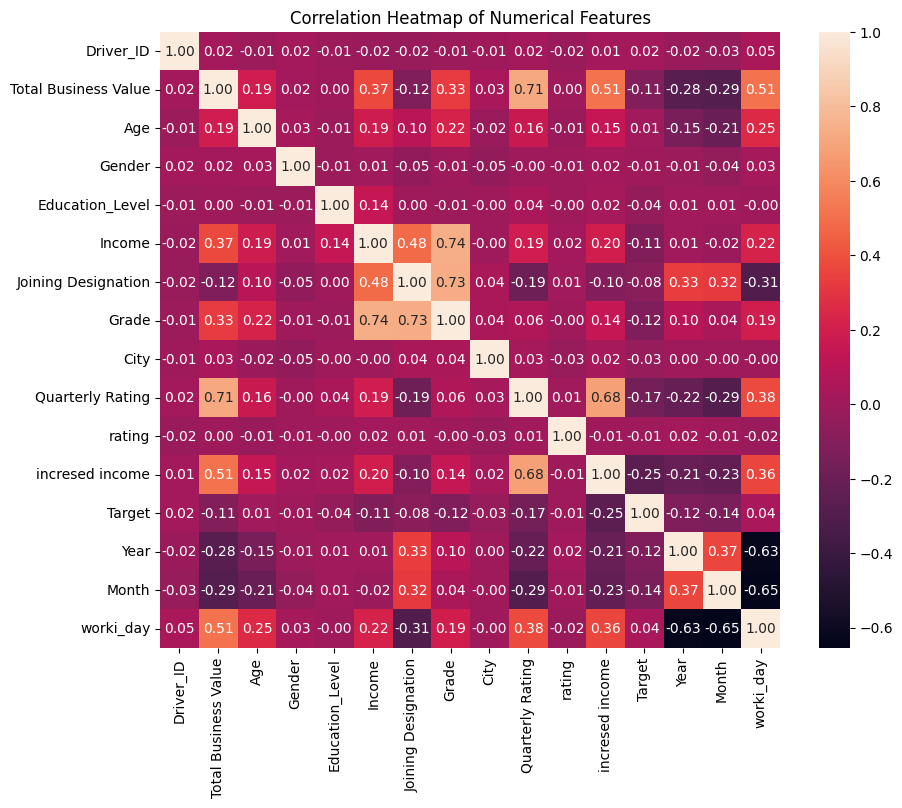

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_aggregated.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

#Class imbalance treatement

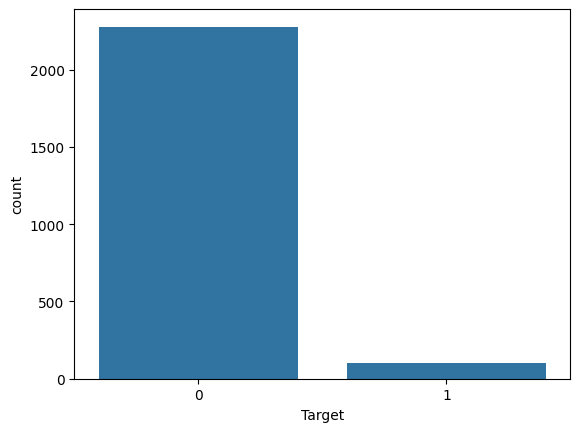

In [70]:
sns.countplot(x = df_aggregated['Target'],data = df_aggregated)
plt.show()

#Dividing dataset into x and y

In [71]:
y = df_aggregated['Target']
x = df_aggregated.drop(['Target'],axis = 1)

In [72]:
x.shape,y.shape

((2381, 15), (2381,))

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [75]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1666, 15), (715, 15), (1666,), (715,))

balancing dataset using diffrent methods

In [76]:
from imblearn.over_sampling import RandomOverSampler

In [77]:
ov_sampler = RandomOverSampler()

In [78]:
x_train_osample,y_train_osample = ov_sampler.fit_resample(x_train,y_train)

In [79]:
print(y_train_osample.value_counts())

Target
0    1595
1    1595
Name: count, dtype: int64


#handling datetime column

In [80]:
df.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,City,rating,Target,incresed income,Year,Month,worki_day
0,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,C23,0.0,0,0,2019,1,735
1,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,C23,0.0,0,0,2019,2,735
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,C23,0.0,1,1,2019,3,735
3,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,0.0,0,0,2020,11,52
4,2.0,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,C7,0.0,0,0,2020,12,52


In [81]:
#df['Year'] = df['MMM-YY'].dt.year   #1

In [82]:
#df['Month'] = df['MMM-YY'].dt.month    #2

In [83]:
#df.drop(['MMM-YY'],axis=1)   #3

In [84]:
#reference_date = df['Dateofjoining'].max()    #4
#reference_date
#df['worki_day'] = (reference_date - df['Dateofjoining']).dt.days
#df['worki_day']


In [85]:
#df.drop(['Dateofjoining'],axis=1,inplace=True)    #5
#df.drop(['MMM-YY'],axis=1,inplace=True)

#Model building

Baging  

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
base_dt = DecisionTreeClassifier(max_depth = 5,random_state = 42)

In [88]:
from sklearn.ensemble import BaggingClassifier

In [89]:
bag_model = BaggingClassifier(
    estimator = base_dt,
    n_estimators = 100,
    random_state = 42,
    n_jobs = -1)

In [90]:
bag_model.fit(x_train_osample,y_train_osample)

,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,100
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [91]:
y_pred_bag = bag_model.predict(x_test)
y_pred_bag

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [92]:
bag_model.score(x_train_osample,y_train_osample)

0.974294670846395

In [93]:
bag_model.score(x_test,y_test)

0.9286713286713286

classification report of bagging model

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_test,y_pred_bag))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       684
           1       0.35      0.74      0.47        31

    accuracy                           0.93       715
   macro avg       0.67      0.84      0.72       715
weighted avg       0.96      0.93      0.94       715



roc curve

In [96]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [97]:
probability = bag_model.predict_proba(x_test)
probability

array([[0.41416942, 0.58583058],
       [1.        , 0.        ],
       [0.96979861, 0.03020139],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]], shape=(715, 2))

In [98]:
probabilities = probability[:,1]
probabilities

array([0.58583058, 0.        , 0.03020139, 0.73123184, 0.        ,
       0.        , 0.        , 0.        , 0.96892707, 0.        ,
       0.42147383, 0.        , 0.        , 0.        , 0.        ,
       0.07397891, 0.        , 0.        , 0.32947759, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.97000957, 0.        , 0.        , 0.        ,
       0.31092418, 0.        , 0.00731173, 0.        , 0.        ,
       0.        , 0.12137885, 0.        , 0.64292015, 0.        ,
       0.        , 0.        , 0.        , 0.19054988, 0.        ,
       0.59590796, 0.        , 0.16053299, 0.        , 0.        ,
       0.        , 0.62188145, 0.        , 0.        , 0.20140777,
       0.        , 0.29578094, 0.        , 0.40031114, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.97729383, 0.        , 0.        , 0.        , 0.     

In [99]:
fpr,tpr,thr = roc_curve(y_test,probabilities)
fpr,tpr,thr

(array([0.        , 0.00584795, 0.00584795, 0.01023392, 0.01023392,
        0.01169591, 0.01315789, 0.01315789, 0.01461988, 0.01608187,
        0.01608187, 0.01754386, 0.01900585, 0.01900585, 0.02192982,
        0.02192982, 0.03070175, 0.03070175, 0.04678363, 0.04678363,
        0.07602339, 0.07602339, 0.07894737, 0.07894737, 0.08479532,
        0.08479532, 0.12280702, 0.12280702, 0.13596491, 0.13596491,
        0.14912281, 0.14912281, 0.17105263, 0.17105263, 0.22222222,
        0.2251462 , 0.23830409, 0.24122807, 0.24269006, 0.24561404,
        0.26023392, 0.26315789, 0.27339181, 0.27631579, 0.28070175,
        0.28362573, 1.        ]),
 array([0.        , 0.03225806, 0.09677419, 0.22580645, 0.25806452,
        0.35483871, 0.38709677, 0.4516129 , 0.51612903, 0.51612903,
        0.5483871 , 0.5483871 , 0.58064516, 0.64516129, 0.64516129,
        0.67741935, 0.67741935, 0.70967742, 0.70967742, 0.74193548,
        0.74193548, 0.77419355, 0.77419355, 0.80645161, 0.80645161,
        0.8387

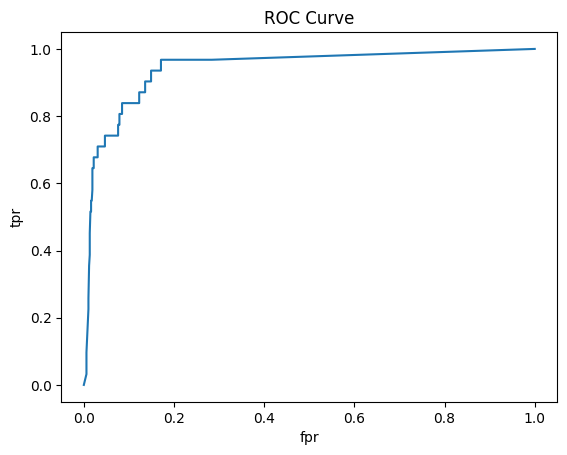

In [100]:
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [101]:
roc_auc_score(y_test,probabilities)

0.9422986229013394

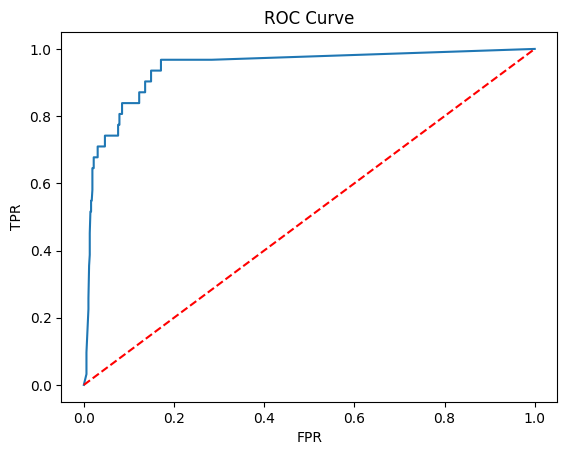

In [102]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--',color = 'red')
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

#boosting

GBDT

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
gbdt = GradientBoostingClassifier(
    n_estimators = 200,
    learning_rate = 0.05,
    max_depth = 5,
    subsample = 1,
    random_state = 42)

In [105]:
gbdt.fit(x_train_osample,y_train_osample)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,200
,subsample,1
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [106]:
y_pred_gbdt = gbdt.predict(x_test)
y_pred_gbdt

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [107]:
gbdt.score(x_train_osample,y_train_osample)

0.9993730407523511

In [108]:
gbdt.score(x_test,y_test)

0.9594405594405594

classificaion report of gbdt

In [109]:
print(classification_report(y_test,y_pred_gbdt))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       684
           1       0.53      0.65      0.58        31

    accuracy                           0.96       715
   macro avg       0.76      0.81      0.78       715
weighted avg       0.96      0.96      0.96       715



ROC Curve

In [110]:
probab_boosting = gbdt.predict_proba(x_test)
probab_boosting

array([[9.68637407e-01, 3.13625933e-02],
       [9.98210168e-01, 1.78983233e-03],
       [9.98425752e-01, 1.57424785e-03],
       ...,
       [9.97071773e-01, 2.92822720e-03],
       [9.98953339e-01, 1.04666102e-03],
       [9.99093306e-01, 9.06693708e-04]], shape=(715, 2))

In [111]:
probability_boosting = probab_boosting[:,1]
probability_boosting

array([3.13625933e-02, 1.78983233e-03, 1.57424785e-03, 2.78833881e-02,
       3.72645098e-04, 9.20861416e-04, 5.50894961e-04, 3.69722533e-04,
       6.40442186e-01, 9.55694301e-04, 8.20086091e-02, 3.81994339e-04,
       1.26285995e-03, 8.14418768e-04, 2.01109435e-03, 7.73506795e-03,
       6.31558024e-04, 7.61862632e-04, 6.04725820e-02, 1.91435991e-03,
       1.20430920e-03, 2.85584813e-03, 6.85734583e-04, 4.85586985e-04,
       1.90721628e-03, 2.16259712e-03, 2.27239739e-03, 4.53111001e-03,
       6.13825187e-04, 8.67564206e-04, 7.14944958e-04, 9.97022628e-01,
       1.02358616e-03, 7.33973097e-04, 1.27508391e-03, 1.29609792e-02,
       8.36653188e-03, 5.29383051e-03, 4.41440659e-04, 2.18758126e-03,
       9.47710026e-04, 1.58230046e-02, 1.02090764e-03, 2.12375965e-01,
       1.12775738e-03, 3.80776249e-04, 9.66278244e-04, 2.00092510e-04,
       5.21887606e-03, 4.25316410e-04, 1.09129828e-01, 4.72709320e-04,
       2.87964282e-03, 4.17881074e-04, 2.12051590e-03, 8.94217369e-04,
      

In [112]:
fpr_bag,tpr_bag,thr_bag = roc_curve(y_test,probability_boosting)

Text(0, 0.5, 'TPR')

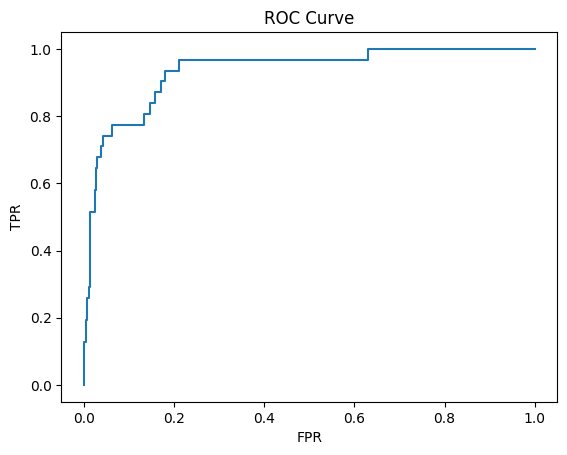

In [113]:
plt.plot(fpr_bag,tpr_bag)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')


XGboost

In [114]:
from xgboost import XGBClassifier


In [115]:
xgb = XGBClassifier(n_estimators = 100,max_depth = 3,learning_rate = 0.1,random_state = 42)

In [116]:
xgb.fit(x_train_osample,y_train_osample)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [117]:
y_pred_xgb = xgb.predict(x_test)

In [118]:
xgb.score(x_train_osample,y_train_osample)

0.9852664576802508

In [119]:
xgb.score(x_test,y_test)

0.9440559440559441

classification_report of xgboost

In [120]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       684
           1       0.42      0.77      0.55        31

    accuracy                           0.94       715
   macro avg       0.71      0.86      0.76       715
weighted avg       0.96      0.94      0.95       715



Stacking

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [122]:
estimators = [('dt',DecisionTreeClassifier(random_state=4)),
            ('lr',LogisticRegression()),
              ('rf',RandomForestClassifier(n_estimators = 100,max_depth = 2,min_samples_split = 3))]

In [123]:
final_estimators = DecisionTreeClassifier()

In [124]:
clf = StackingClassifier(estimators = estimators,final_estimator = final_estimators,cv = 5)

In [125]:
clf.fit(x_train_osample,y_train_osample)

,estimators,"[('dt', ...), ('lr', ...), ...]"
,final_estimator,DecisionTreeClassifier()
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [126]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [127]:
clf.score(x_train_osample,y_train_osample)

0.9394984326018809

In [128]:
clf.score(x_test,y_test)

0.9524475524475524

In [129]:
y_pred_clf = clf.predict(x_test)
y_pred_clf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

classification report of stacking

In [130]:
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       684
           1       0.44      0.35      0.39        31

    accuracy                           0.95       715
   macro avg       0.71      0.67      0.68       715
weighted avg       0.95      0.95      0.95       715



In [131]:
y_pred_stacked = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_stacked)
accuracy

0.9524475524475524

In [132]:
x_train_osample

,Driver_ID,Total Business Value,Age,Gender,Education_Level,Income,Joining Designation,Grade,City,Quarterly Rating,rating,incresed income,Year,Month,worki_day
0,2763.0,3356980.0,37.0,1.0,0.0,76756.0,3.0,3.0,5,2.000000,0.0,0.555556,2020,4,268
1,1067.0,1995410.0,40.0,0.0,2.0,68596.0,1.0,3.0,6,1.000000,0.0,0.250000,2019,1,1708
2,2375.0,0.0,41.0,0.0,1.0,15189.0,1.0,1.0,3,1.000000,0.0,0.000000,2019,1,951
3,2600.0,3780770.0,41.0,1.0,0.0,26460.0,2.0,2.0,14,2.000000,0.0,0.444444,2019,1,2045
4,873.0,32819830.0,32.0,1.0,2.0,134302.0,1.0,4.0,28,2.722222,0.0,0.444444,2019,3,646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,689.0,0.0,28.0,1.0,1.0,17186.0,1.0,1.0,10,1.000000,0.0,0.000000,2019,1,806
3186,445.0,0.0,32.0,0.0,0.0,33956.0,2.0,2.0,8,1.000000,0.0,0.000000,2019,1,723
3187,1759.0,0.0,31.0,0.0,2.0,22738.0,1.0,1.0,28,1.000000,0.0,0.000000,2019,1,863
3188,1978.0,0.0,41.0,0.0,0.0,12553.0,1.0,1.0,17,1.000000,0.0,0.000000,2019,1,750


In [135]:
import joblib as jb
jb.dump(clf,'clf.pkl')

['clf.pkl']

In [136]:
loaded_model = jb.load('clf.pkl')